# Template Matching

The basic idea is:

- You have a template image that represents the pattern or object you want to detect (e.g., a digit, a logo, or a face).

- You "slide" this template across the larger image, comparing the template with the local region of the same size at each position.

- At each position, a similarity measure (or error measure) is computed between the template and the image patch.

- The location(s) where the similarity is highest (or error is lowest) indicate where the template most likely occurs in the larger image.

In [24]:
import matplotlib.pyplot as plt
import seaborn as snsComputer
import numpy as np
from PIL import Image
import cv2

### Step 1: Load the Images

In [25]:
original_image = Image.open("C:/Meet/PDEU/Semester 7/Computer Vision Lab/Computer-Vision/Images/Rocket_Image.jpg").convert('L')
template = Image.open('C:/Meet/PDEU/Semester 7/Computer Vision Lab/Computer-Vision/Images/Template_Rocket.jpg').convert('L')
img = np.array(original_image)
template = np.array(template)
h, w = template.shape[:2]

### Step 2: Choose the similarity method

a) Correlation Coefficient
The idea is to measure how much the template correlates with the local patch in the image, after removing the average brightness.
- TM_CCOEFF_NORMED does three simple things at every template position:
- Subtract the average (mean) brightness from the template and from the image patch — this removes overall brightness bias.
- Multiply corresponding pixels (template × patch) and sum those products — this measures how their variations line up.
- Divide by the product of their sizes (square-roots of sums of squared variations) — this normalizes the score so it’s between -1 and +1. 
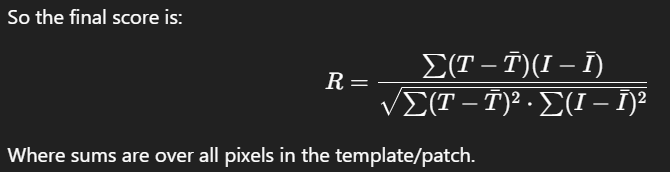

In [26]:
# Implement Template matching
# Decide the similarity method
method = cv2.TM_CCOEFF_NORMED

### Step 3: Match the template and evaluate scores

In [27]:
res = cv2.matchTemplate(img, template, method)

### Step 4: Find Peaks to determine best match

In [28]:
# Locate the best match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# For TM_CCOEFF_NORMED → higher is better
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
# Draw rectangle on a copy of the original image
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.rectangle(img_color, top_left, bottom_right, (0,0,255), 2)

array([[[162, 162, 162],
        [156, 156, 156],
        [157, 157, 157],
        ...,
        [196, 196, 196],
        [194, 194, 194],
        [192, 192, 192]],

       [[161, 161, 161],
        [152, 152, 152],
        [148, 148, 148],
        ...,
        [197, 197, 197],
        [197, 197, 197],
        [191, 191, 191]],

       [[166, 166, 166],
        [161, 161, 161],
        [153, 153, 153],
        ...,
        [192, 192, 192],
        [193, 193, 193],
        [189, 189, 189]],

       ...,

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 64,  64,  64],
        ...,
        [ 79,  79,  79],
        [ 73,  73,  73],
        [ 67,  67,  67]],

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [ 83,  83,  83],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[ 81,  81,  81],
        [ 91,  91,  91],
        [ 88,  88,  88],
        ...,
        [ 84,  84,  84],
        [ 94,  94,  94],
        [ 98,  98,  98]]

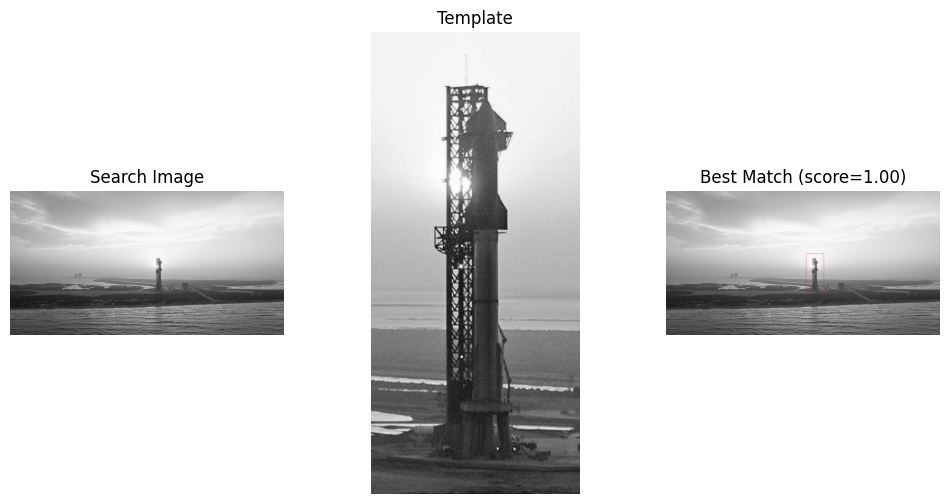

In [29]:
# 6) Display results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray'); plt.title("Search Image"); plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(template, cmap='gray'); plt.title("Template"); plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_color[:,:,::-1]); plt.title(f"Best Match (score={max_val:.2f})"); plt.axis("off")

plt.show()

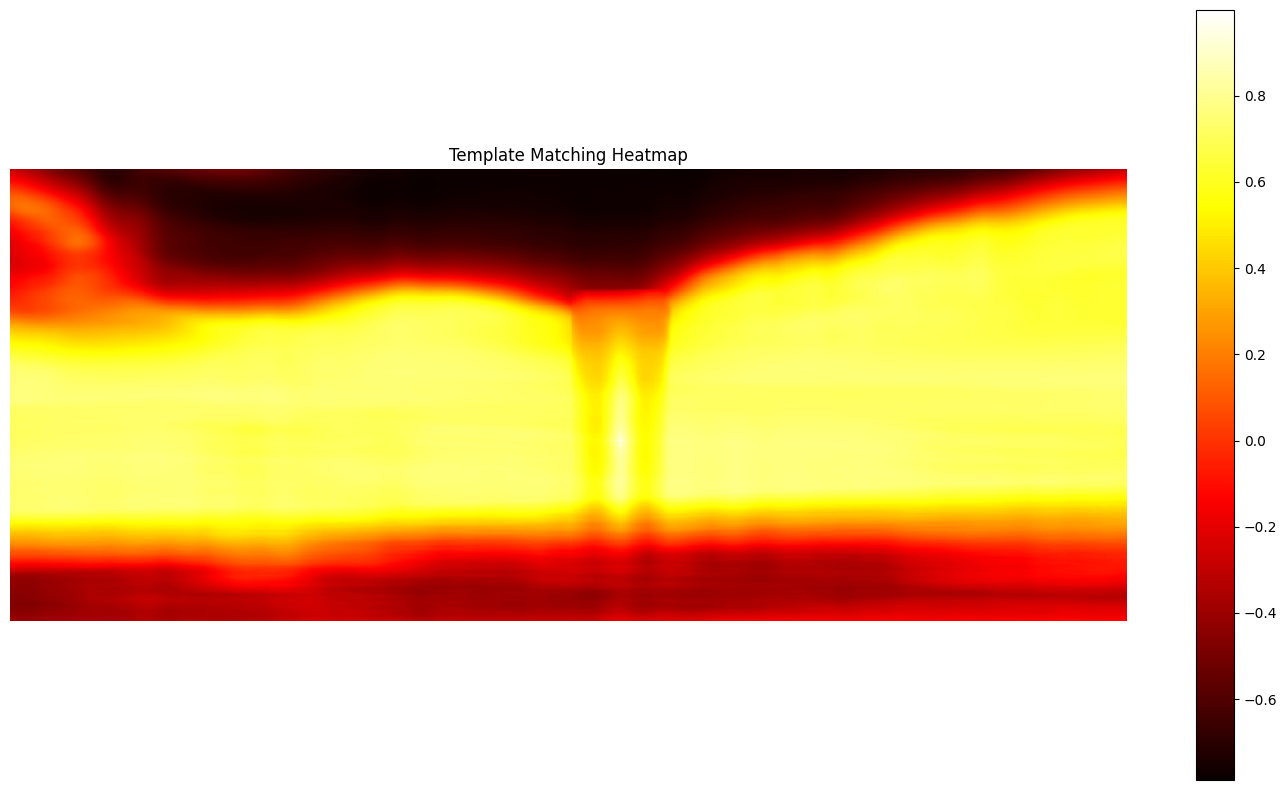

In [34]:
# Plotting a heatmap of similarity scores
plt.figure(figsize=(18,10))
plt.imshow(res, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Template Matching Heatmap")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('off')
plt.show()

Using method: cv2.TM_CCOEFF
Min value: -192412992.0, Max value: 597741248.0


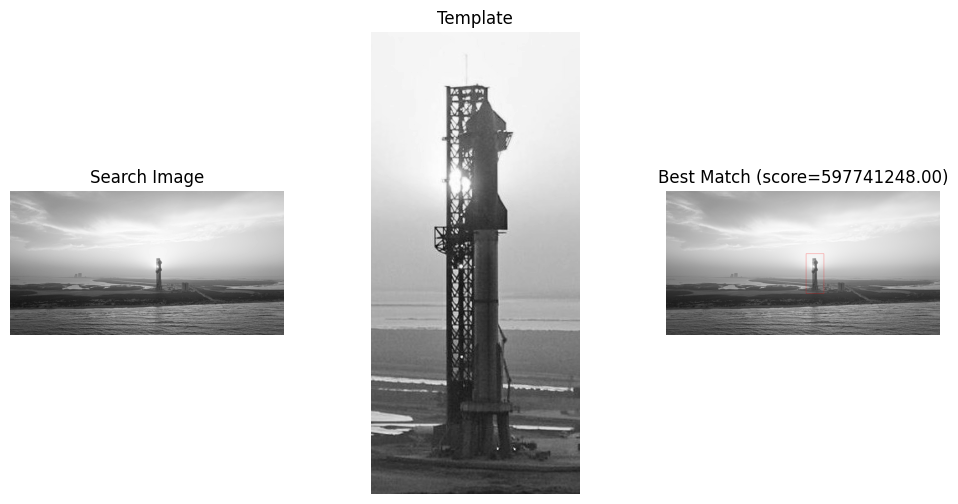

Using method: cv2.TM_CCOEFF_NORMED
Min value: -0.7874274253845215, Max value: 0.9988060593605042


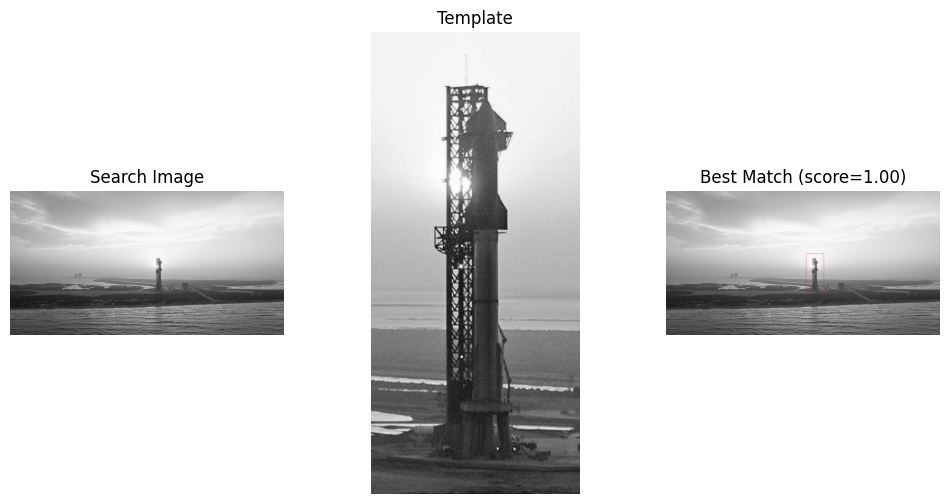

Using method: cv2.TM_CCORR
Min value: 1348319872.0, Max value: 5615209472.0


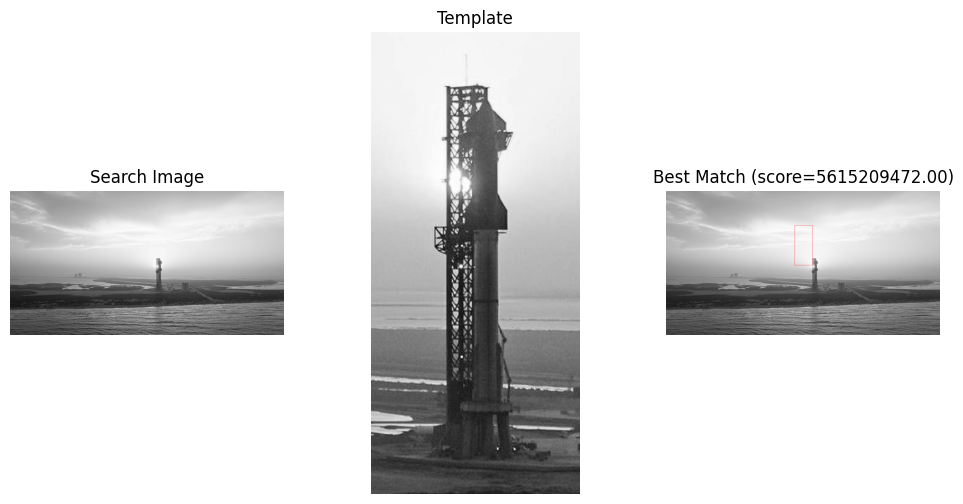

Using method: cv2.TM_CCORR_NORMED
Min value: 0.7866256237030029, Max value: 0.9998380541801453


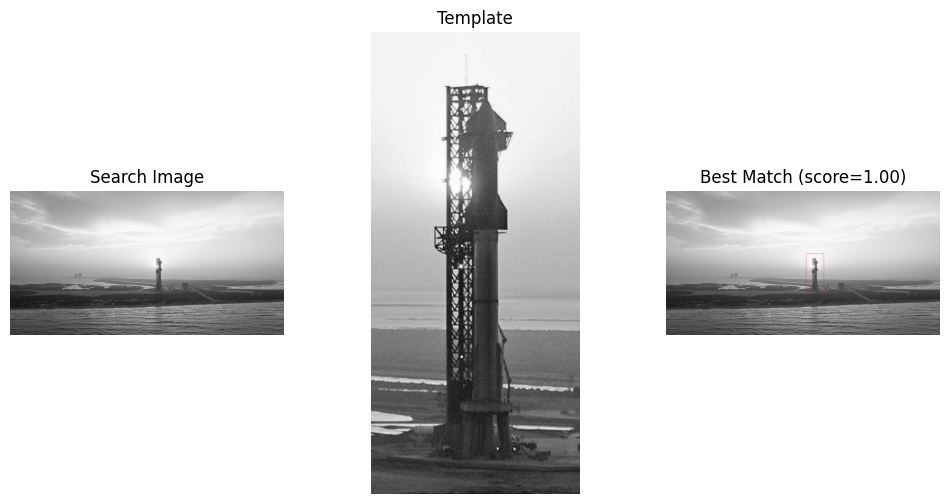

Using method: cv2.TM_SQDIFF
Min value: 1434112.0, Max value: 2365786112.0


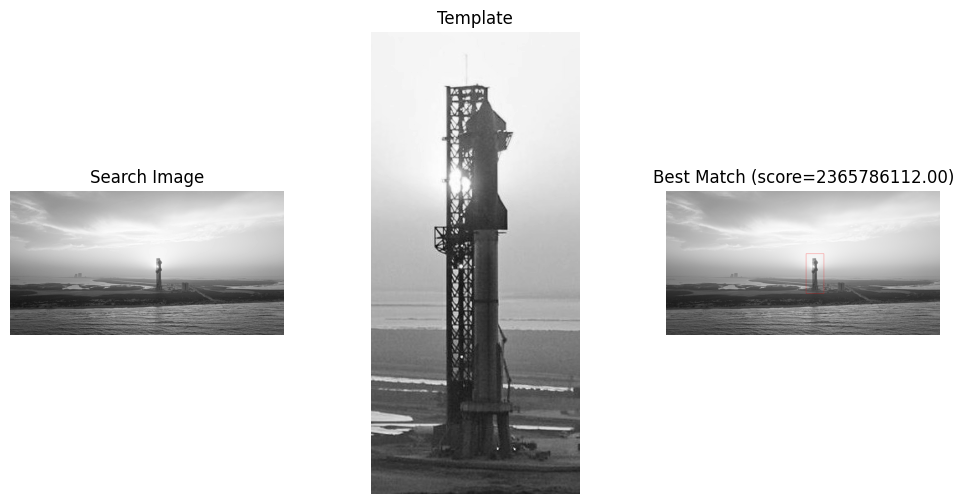

Using method: cv2.TM_SQDIFF_NORMED
Min value: 0.0003247233107686043, Max value: 1.0


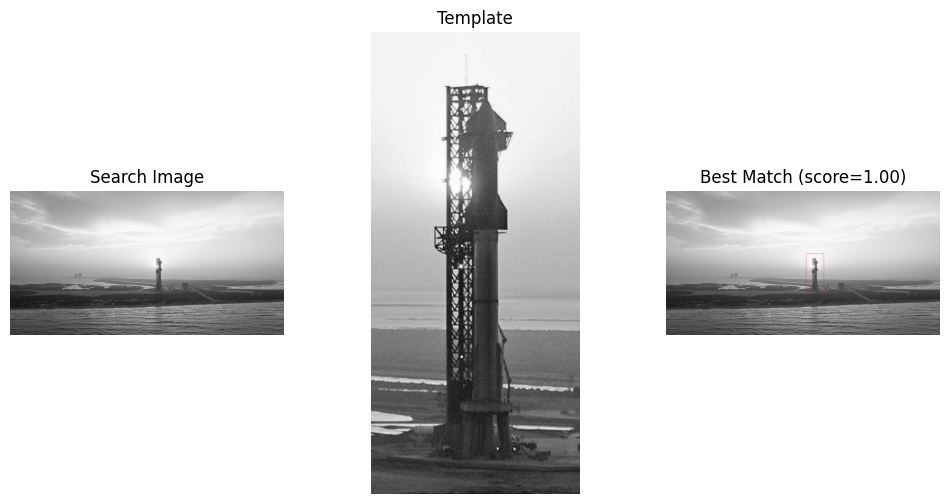

In [35]:
# Implementing other template matching methods

methods = {
    "cv2.TM_CCOEFF": cv2.TM_CCOEFF,
    "cv2.TM_CCOEFF_NORMED": cv2.TM_CCOEFF_NORMED,
    "cv2.TM_CCORR": cv2.TM_CCORR,
    "cv2.TM_CCORR_NORMED": cv2.TM_CCORR_NORMED,
    "cv2.TM_SQDIFF": cv2.TM_SQDIFF,
    "cv2.TM_SQDIFF_NORMED": cv2.TM_SQDIFF_NORMED
}

for method_name, method in methods.items():
    print(f"Using method: {method_name}")
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(f"Min value: {min_val}, Max value: {max_val}")

# Visualizing the results
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(img_color, top_left, bottom_right, (0,0,255), 2)

    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray'); plt.title("Search Image"); plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(template, cmap='gray'); plt.title("Template"); plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(img_color[:,:,::-1]); plt.title(f"Best Match (score={max_val:.2f})"); plt.axis("off")

    plt.show()